In [1]:
from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0,1,-1]])
    # print(data)
    return data[:,:2], data[:,-1]

In [3]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
X.shape

(100, 2)

In [8]:
y.shape

(100,)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(70, 2) (30, 2) (70,) (30,)


In [11]:
class LogisticReressionClassifier:
    def __init__(self, max_iter=200, learning_rate=0.01):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        
    def sigmoid(self, x):
        return 1 / (1 + exp(-x))

    def data_matrix(self, X):
        data_mat = []
        for d in X:
            data_mat.append([1.0, *d])
        return data_mat

    def fit(self, X, y):
        # label = np.mat(y)
        data_mat = self.data_matrix(X) # m*n
        self.weights = np.zeros((len(data_mat[0]),1), dtype=np.float32)

        for iter_ in range(self.max_iter):
            for i in range(len(X)):
                result = self.sigmoid(np.dot(data_mat[i], self.weights))
                error = y[i] - result 
                self.weights += self.learning_rate * error * np.transpose([data_mat[i]])
        print('LogisticRegression Model(learning_rate={},max_iter={})'.format(self.learning_rate, self.max_iter))

    # def f(self, x):
    #     return -(self.weights[0] + self.weights[1] * x) / self.weights[2]

    def score(self, X_test, y_test):
        right = 0
        X_test = self.data_matrix(X_test)
        for x, y in zip(X_test, y_test):
            result = np.dot(x, self.weights)
            if (result > 0 and y == 1) or (result < 0 and y == 0):
                right += 1
        return right / len(X_test)

In [12]:
lr_clf = LogisticReressionClassifier()
lr_clf.fit(X_train, y_train)

LogisticRegression Model(learning_rate=0.01,max_iter=200)


In [13]:
lr_clf.score(X_test, y_test)

1.0

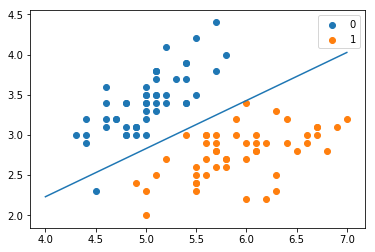

In [14]:
x_ponits = np.arange(4, 8)
y_ = -(lr_clf.weights[1]*x_ponits + lr_clf.weights[0])/lr_clf.weights[2]
plt.plot(x_ponits, y_)

#lr_clf.show_graph()
plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()

进入data_matrix函数。这里在每个x的属性之前都加了一个1，表示x_0，代表截距b。其中`*d`加了星号，其用法是把d中的数据解压，消除了array性质的影响。Another usage of the `*l` idiom is to unpack argument lists when calling a function.

In [27]:
def data_matrix(X):
    data_mat = []
    for d in X:
        data_mat.append([1.0, *d])
    return data_mat

In [31]:
data_mat = data_matrix(X)
data_mat[:10]

[[1.0, 5.0999999999999996, 3.5],
 [1.0, 4.9000000000000004, 3.0],
 [1.0, 4.7000000000000002, 3.2000000000000002],
 [1.0, 4.5999999999999996, 3.1000000000000001],
 [1.0, 5.0, 3.6000000000000001],
 [1.0, 5.4000000000000004, 3.8999999999999999],
 [1.0, 4.5999999999999996, 3.3999999999999999],
 [1.0, 5.0, 3.3999999999999999],
 [1.0, 4.4000000000000004, 2.8999999999999999],
 [1.0, 4.9000000000000004, 3.1000000000000001]]

In [24]:
X[:10]

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6],
       [ 5.4,  3.9],
       [ 4.6,  3.4],
       [ 5. ,  3.4],
       [ 4.4,  2.9],
       [ 4.9,  3.1]])

In [32]:
len(data_mat[0])

3

In [34]:
(len(data_mat[0]),1)

(3, 1)

In [35]:
weights = np.zeros((len(data_mat[0]),1), dtype=np.float32)

In [36]:
weights

array([[ 0.],
       [ 0.],
       [ 0.]], dtype=float32)

进入fit函数

In [38]:
def sigmoid(x):
        return 1 / (1 + exp(-x))

In [39]:
max_iter = 200
learning_rate = 0.01

In [56]:
for iter_ in range(max_iter):
    for i in range(len(X)):
        result = sigmoid(np.dot(data_mat[i], weights))
        error = y[i] - result 
        weights += learning_rate * error * np.transpose([data_mat[i]])
print('LogisticRegression Model(learning_rate={},max_iter={})'.format(learning_rate, max_iter))

LogisticRegression Model(learning_rate=0.01,max_iter=200)


dot是正规的矩阵乘法，而普通的`*`则是点对点乘法

In [40]:
a = np.array([[1,2],[3,4]]) 
b = np.array([[11,12],[13,14]]) 
np.dot(a,b)

array([[37, 40],
       [85, 92]])

In [41]:
a * b

array([[11, 24],
       [39, 56]])

In [44]:
np.dot(data_mat[0], weights)

array([ 0.])

In [47]:
data_mat[2]

[1.0, 4.7000000000000002, 3.2000000000000002]

In [51]:
np.transpose(data_mat[2])

array([ 1. ,  4.7,  3.2])

In [52]:
np.transpose(data_mat[2]).shape

(3,)

在`data_mat[2]`外面又套了一层`[]`，使其shape变为`[[1.0, 4.7, 3.2]]`，然后再进行转置

In [50]:
np.transpose([data_mat[2]])

array([[ 1. ],
       [ 4.7],
       [ 3.2]])

In [57]:
weights

array([[-1.15475583],
       [ 3.90847349],
       [-6.28261614]], dtype=float32)

进入score函数：

In [53]:
def score(self, X_test, y_test):
    right = 0
    X_test = self.data_matrix(X_test)
    for x, y in zip(X_test, y_test):
        result = np.dot(x, self.weights)
        if (result > 0 and y == 1) or (result < 0 and y == 0):
            right += 1
    return right / len(X_test)

In [59]:
X_test = data_matrix(X_test)
X_test[:10]

[[1.0, 4.7999999999999998, 3.1000000000000001],
 [1.0, 5.7000000000000002, 2.7999999999999998],
 [1.0, 4.9000000000000004, 3.1000000000000001],
 [1.0, 5.0, 3.6000000000000001],
 [1.0, 5.2000000000000002, 2.7000000000000002],
 [1.0, 6.7999999999999998, 2.7999999999999998],
 [1.0, 6.2000000000000002, 2.8999999999999999],
 [1.0, 4.2999999999999998, 3.0],
 [1.0, 6.0999999999999996, 3.0],
 [1.0, 4.4000000000000004, 3.2000000000000002]]

In [60]:
y = np.dot(X_test[0], weights)

In [61]:
y

array([-1.8701931])